# Counterfeit Medicines Sales Prediction

### Importing Libraries and the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os 
os.chdir('C:\\Data')

file = r'/Data/counterfeit_train.csv'
file2=r'/Data/counterfeit_test.csv'

gg=pd.read_csv(file)

hh=pd.read_csv(file2)

In [2]:
gg.dtypes

Medicine_ID             object
Counterfeit_Weight     float64
DistArea_ID             object
Active_Since             int64
Medicine_MRP           float64
Medicine_Type           object
SidEffect_Level         object
Availability_rating    float64
Area_Type               object
Area_City_Type          object
Area_dist_level         object
Counterfeit_Sales      float64
dtype: object

In [3]:
gg.columns

Index(['Medicine_ID', 'Counterfeit_Weight', 'DistArea_ID', 'Active_Since',
       'Medicine_MRP', 'Medicine_Type', 'SidEffect_Level',
       'Availability_rating', 'Area_Type', 'Area_City_Type', 'Area_dist_level',
       'Counterfeit_Sales'],
      dtype='object')

C:\Anaconda folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Counterfeit_Sales', ylabel='Density'>

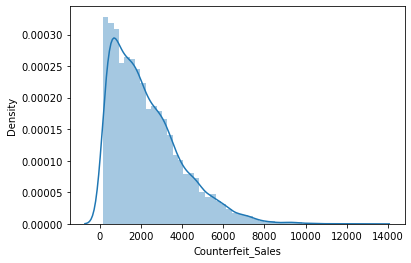

In [4]:
sns.distplot(gg['Counterfeit_Sales'])

In [5]:
gg['Counterfeit_Sales'].skew()

1.1820561465614312

In [6]:
gg['Counterfeit_Sales'] = np.log(gg['Counterfeit_Sales'])
gg['Counterfeit_Sales'].skew()

-0.5558234795181309

C:\Anaconda folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Counterfeit_Sales', ylabel='Density'>

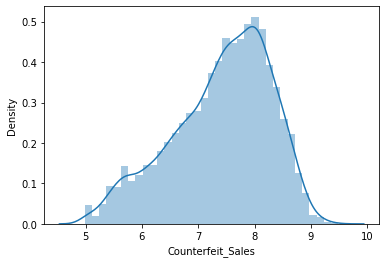

In [7]:
sns.distplot(gg['Counterfeit_Sales'])

<AxesSubplot:xlabel='Counterfeit_Sales'>

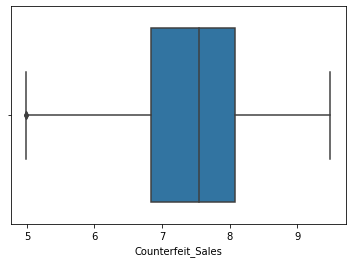

In [8]:
sns.boxplot(x=gg['Counterfeit_Sales'])

In [9]:
hh['Counterfeit_Sales']= np.nan

In [10]:
gg.shape , hh.shape

((6818, 12), (1705, 12))

In [11]:
gg['data']='train'
hh['data']='test'

<AxesSubplot:xlabel='Counterfeit_Sales', ylabel='Count'>

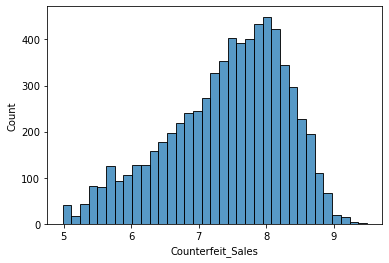

In [12]:
from scipy import stats


sns.histplot(data=gg, x= 'Counterfeit_Sales')

<AxesSubplot:xlabel='Counterfeit_Sales'>

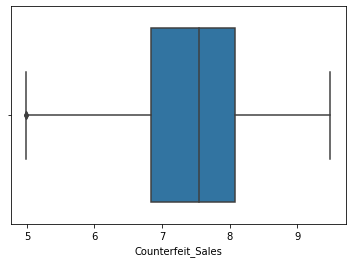

In [13]:
sns.boxplot(x=gg['Counterfeit_Sales'])

Removing outliers 

In [14]:
# zscore_comp = np.abs(stats.zscore(gg['Counterfeit_Sales']))

# threshold=3
# drp_idx = np.where(zscore_comp>threshold)[0]

In [15]:
# gg.drop(drp_idx, inplace=True)

In [16]:
gg.shape , hh.shape

((6818, 13), (1705, 13))

C:\Anaconda folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Counterfeit_Sales', ylabel='Density'>

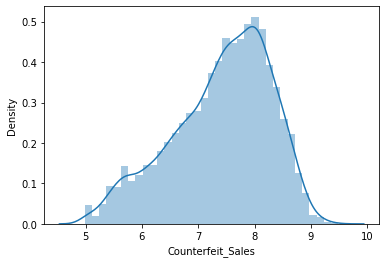

In [17]:
sns.distplot(gg['Counterfeit_Sales'])

<AxesSubplot:xlabel='Counterfeit_Sales'>

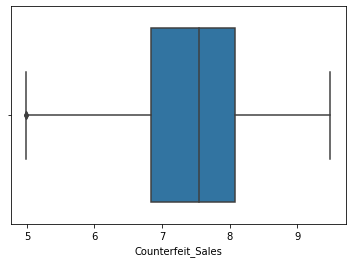

In [18]:
sns.boxplot(x=gg['Counterfeit_Sales'])

Now all of the outliers are removed

In [19]:
hh=hh[gg.columns]

In [20]:
allll=pd.concat([gg,hh], axis=0)

In [21]:
allll

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales,data
0,RRA15,13.100,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,7.481839,train
1,YVV26,NaN,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,8.029157,train
2,LJC15,9.025,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,7.864455,train
3,GWC40,11.800,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,7.004622,train
4,QMN13,NaN,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,5.068528,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,KXW10,NaN,Area027,1983,136.5704,Hreplacements,mild,0.050505,CityLimits,Tier 3,Medium,NaN,test
1701,CKE54,21.300,Area035,2002,57.0744,Antibiotics,critical,0.041118,DownTown,Tier 2,Small,NaN,test
1702,HAY13,20.400,Area017,2005,182.7422,Antiseptics,mild,0.191273,DownTown,Tier 2,Unknown,NaN,test
1703,ZEE32,20.000,Area018,2007,266.9672,Hreplacements,mild,0.013000,Industrial,Tier 3,Medium,NaN,test


<AxesSubplot:>

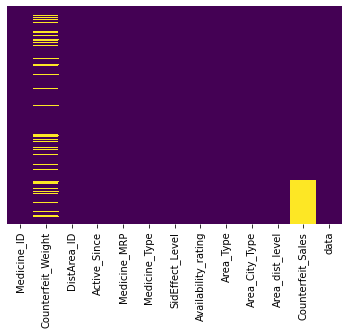

In [22]:
sns.heatmap(allll.isnull(), yticklabels= False, cbar= False, cmap= 'viridis')

In [23]:
allll.isnull().sum()/allll.shape[0] *100

Medicine_ID             0.000000
Counterfeit_Weight     17.165317
DistArea_ID             0.000000
Active_Since            0.000000
Medicine_MRP            0.000000
Medicine_Type           0.000000
SidEffect_Level         0.000000
Availability_rating     0.000000
Area_Type               0.000000
Area_City_Type          0.000000
Area_dist_level         0.000000
Counterfeit_Sales      20.004693
data                    0.000000
dtype: float64

In [24]:
allll.dtypes

Medicine_ID             object
Counterfeit_Weight     float64
DistArea_ID             object
Active_Since             int64
Medicine_MRP           float64
Medicine_Type           object
SidEffect_Level         object
Availability_rating    float64
Area_Type               object
Area_City_Type          object
Area_dist_level         object
Counterfeit_Sales      float64
data                    object
dtype: object

In [25]:
allll['DistArea_ID'].value_counts()

Area027    935
Area013    932
Area049    930
Area035    930
Area046    930
Area045    929
Area018    928
Area017    926
Area010    555
Area019    528
Name: DistArea_ID, dtype: int64

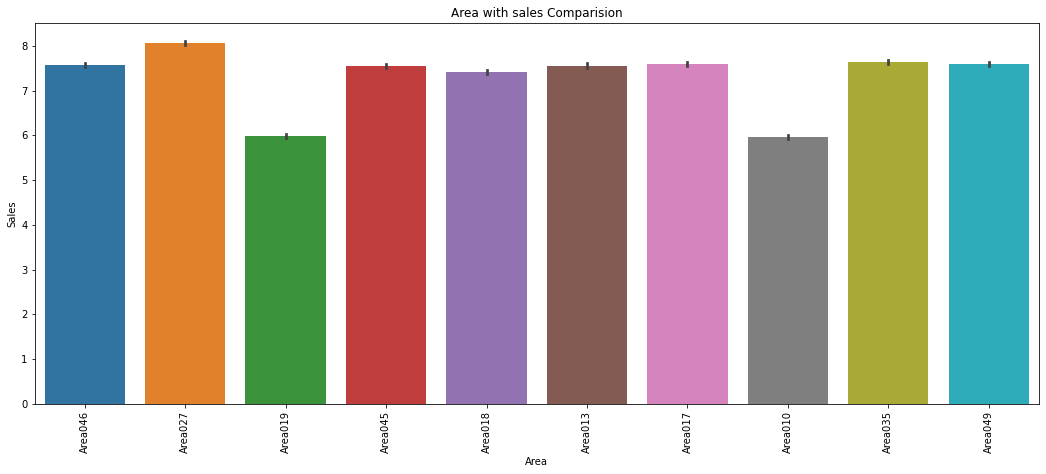

In [24]:
plt.figure(figsize=(18,7))
sns.barplot(x='DistArea_ID',y='Counterfeit_Sales',data=allll)
plt.title('Area with sales Comparision')
plt.xlabel('Area')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()

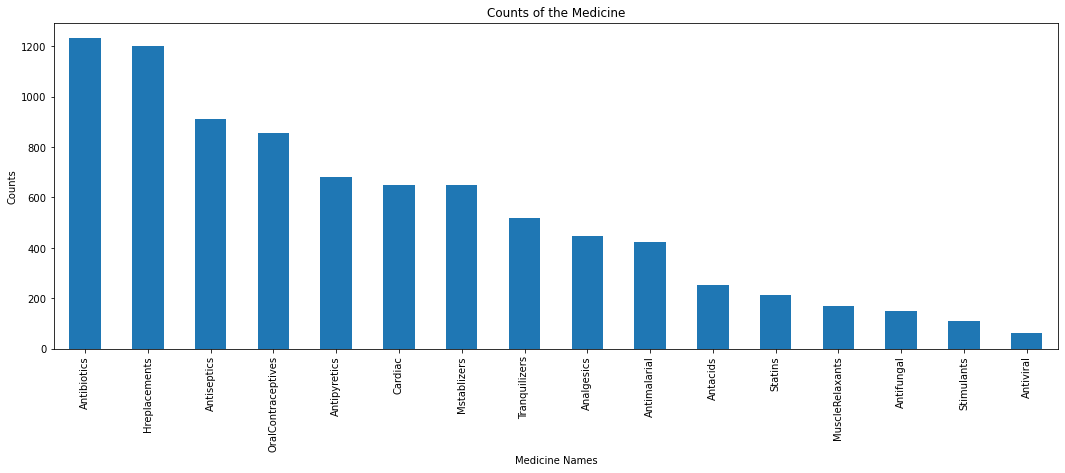

In [25]:
allll['Medicine_Type'].value_counts().sort_values(ascending=False).plot(kind='bar',figsize=(18,6))
plt.xlabel('Medicine Names')
plt.ylabel('Counts')
plt.title('Counts of the Medicine')
plt.show()

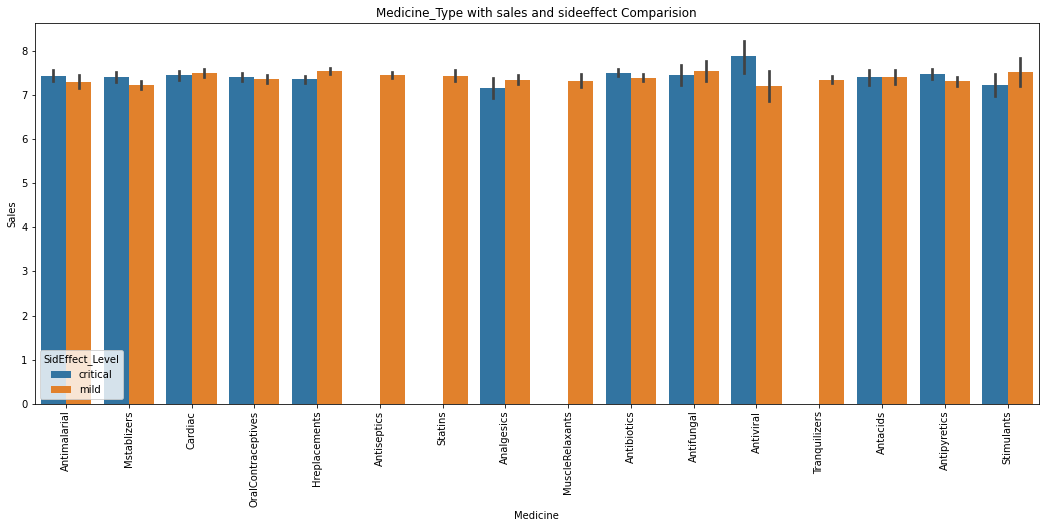

In [26]:
plt.figure(figsize=(18,7))
sns.barplot(x='Medicine_Type',y='Counterfeit_Sales', hue='SidEffect_Level',data=allll)
plt.title('Medicine_Type with sales and sideeffect Comparision')
plt.xlabel('Medicine')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()

In [27]:
allll.columns

Index(['Medicine_ID', 'Counterfeit_Weight', 'DistArea_ID', 'Active_Since',
       'Medicine_MRP', 'Medicine_Type', 'SidEffect_Level',
       'Availability_rating', 'Area_Type', 'Area_City_Type', 'Area_dist_level',
       'Counterfeit_Sales', 'data'],
      dtype='object')

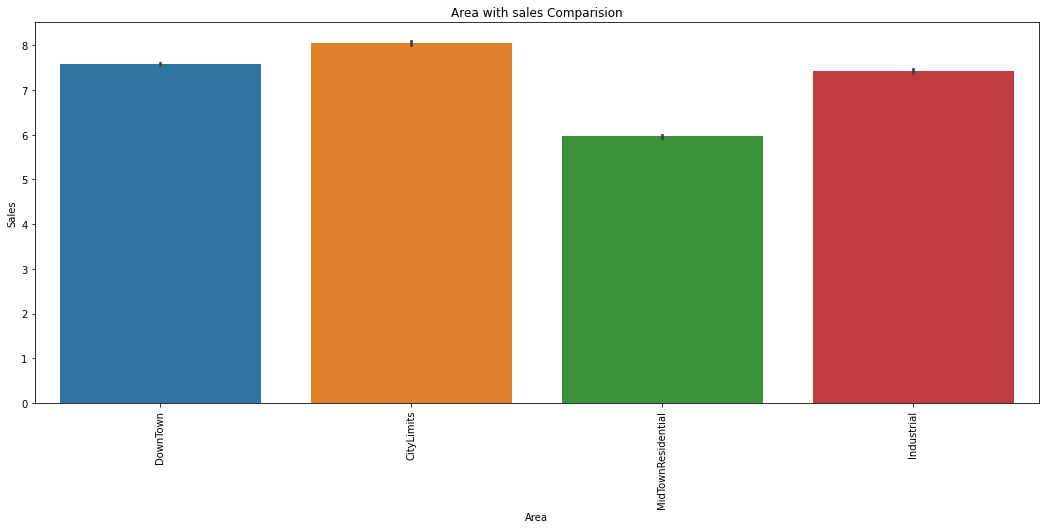

In [28]:
plt.figure(figsize=(18,7))
sns.barplot(x='Area_Type',y='Counterfeit_Sales',data=allll)
plt.title('Area with sales Comparision')
plt.xlabel('Area')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()

In [29]:
allll['current_year']=2021

In [30]:
allll['no_of_years_active']=allll['current_year']-allll['Active_Since']

In [31]:
allll

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales,data,current_year,no_of_years_active
0,RRA15,13.100,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,7.481839,train,2021,26
1,YVV26,NaN,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,8.029157,train,2021,38
2,LJC15,9.025,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,7.864455,train,2021,26
3,GWC40,11.800,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,7.004622,train,2021,26
4,QMN13,NaN,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,5.068528,train,2021,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,KXW10,NaN,Area027,1983,136.5704,Hreplacements,mild,0.050505,CityLimits,Tier 3,Medium,NaN,test,2021,38
1701,CKE54,21.300,Area035,2002,57.0744,Antibiotics,critical,0.041118,DownTown,Tier 2,Small,NaN,test,2021,19
1702,HAY13,20.400,Area017,2005,182.7422,Antiseptics,mild,0.191273,DownTown,Tier 2,Unknown,NaN,test,2021,16
1703,ZEE32,20.000,Area018,2007,266.9672,Hreplacements,mild,0.013000,Industrial,Tier 3,Medium,NaN,test,2021,14


In [32]:
allll= allll.drop(['Active_Since','current_year'], axis=1)

In [33]:
allll.columns

Index(['Medicine_ID', 'Counterfeit_Weight', 'DistArea_ID', 'Medicine_MRP',
       'Medicine_Type', 'SidEffect_Level', 'Availability_rating', 'Area_Type',
       'Area_City_Type', 'Area_dist_level', 'Counterfeit_Sales', 'data',
       'no_of_years_active'],
      dtype='object')

In [34]:
##########################################################################3

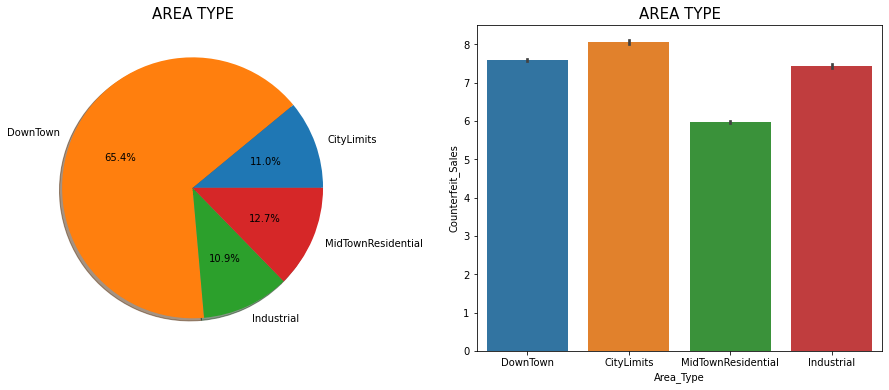

In [35]:
fig, ax=plt.subplots(1,2, figsize=(16,6))
allll['Area_Type'].value_counts().sort_index().plot.pie(explode=[0,0,0,0],
                                                          autopct='%1.1f%%', shadow=True, ax=ax[0])
ax[0].set_title('AREA TYPE', fontsize=15)
ax[0].set_ylabel(' ')
sns.barplot(x='Area_Type',y='Counterfeit_Sales',data=allll, ax=ax[1])
ax[1].set_title('AREA TYPE', fontsize=15)
plt.show()

In [36]:
allll

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales,data,no_of_years_active
0,RRA15,13.100,Area046,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,7.481839,train,26
1,YVV26,NaN,Area027,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,8.029157,train,38
2,LJC15,9.025,Area046,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,7.864455,train,26
3,GWC40,11.800,Area046,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,7.004622,train,26
4,QMN13,NaN,Area019,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,5.068528,train,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,KXW10,NaN,Area027,136.5704,Hreplacements,mild,0.050505,CityLimits,Tier 3,Medium,NaN,test,38
1701,CKE54,21.300,Area035,57.0744,Antibiotics,critical,0.041118,DownTown,Tier 2,Small,NaN,test,19
1702,HAY13,20.400,Area017,182.7422,Antiseptics,mild,0.191273,DownTown,Tier 2,Unknown,NaN,test,16
1703,ZEE32,20.000,Area018,266.9672,Hreplacements,mild,0.013000,Industrial,Tier 3,Medium,NaN,test,14


In [37]:
allll['Counterfeit_Weight'].value_counts()

13.450    86
18.900    82
14.950    77
13.100    76
10.600    68
          ..
7.035      2
7.820      1
6.700      1
8.985      1
10.720     1
Name: Counterfeit_Weight, Length: 415, dtype: int64

In [38]:
impute_counter_wt_dict = allll.groupby(['Medicine_ID'])['Counterfeit_Weight'].mean().to_dict()

In [39]:
for key, values in impute_counter_wt_dict.items():
    allll.loc[allll['Medicine_ID']==key, 'Counterfeit_Weight'] = np.round(values)

allll.drop(allll[allll['Counterfeit_Weight'].isna()].index ,  inplace=True)

In [40]:
allll.isnull().sum()

Medicine_ID               0
Counterfeit_Weight        0
DistArea_ID               0
Medicine_MRP              0
Medicine_Type             0
SidEffect_Level           0
Availability_rating       0
Area_Type                 0
Area_City_Type            0
Area_dist_level           0
Counterfeit_Sales      1704
data                      0
no_of_years_active        0
dtype: int64

In [41]:
s= allll['Availability_rating'].values.reshape(-1,1)

In [42]:
s[10]

array([0.013])

In [43]:
from sklearn.preprocessing import KBinsDiscretizer

availability_disctriz = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='quantile')
allll['Availability_rating_bins'] = availability_disctriz.fit_transform(allll['Availability_rating'].values.reshape(-1,1)).astype(int)


In [44]:
allll['Availability_rating_bins']

0       4
1       0
2       3
3       3
4       7
       ..
1700    2
1701    2
1702    7
1703    0
1704    5
Name: Availability_rating_bins, Length: 8518, dtype: int32

In [45]:
cols_to_disc      = ['Counterfeit_Weight','Medicine_MRP']
cols_to_disc_bins = ['Counterfeit_Weight_bins','Medicine_MRP_bins']
disctriz = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='quantile')
allll[cols_to_disc_bins] = allll[cols_to_disc]
allll[cols_to_disc_bins] = disctriz.fit_transform(allll[cols_to_disc]).astype(int)

In [46]:
allll

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales,data,no_of_years_active,Availability_rating_bins,Counterfeit_Weight_bins,Medicine_MRP_bins
0,RRA15,13.0,Area046,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,7.481839,train,26,4,3,4
1,YVV26,7.0,Area027,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,8.029157,train,38,0,0,2
2,LJC15,9.0,Area046,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,7.864455,train,26,3,1,7
3,GWC40,12.0,Area046,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,7.004622,train,26,3,3,1
4,QMN13,9.0,Area019,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,5.068528,train,38,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,KXW10,17.0,Area027,136.5704,Hreplacements,mild,0.050505,CityLimits,Tier 3,Medium,NaN,test,38,2,5,3
1701,CKE54,21.0,Area035,57.0744,Antibiotics,critical,0.041118,DownTown,Tier 2,Small,NaN,test,19,2,7,0
1702,HAY13,20.0,Area017,182.7422,Antiseptics,mild,0.191273,DownTown,Tier 2,Unknown,NaN,test,16,7,7,5
1703,ZEE32,20.0,Area018,266.9672,Hreplacements,mild,0.013000,Industrial,Tier 3,Medium,NaN,test,14,0,7,7


In [47]:
allll= allll.drop(['Availability_rating','Counterfeit_Weight','Medicine_MRP'], axis=1)

In [48]:
allll

,Medicine_ID,DistArea_ID,Medicine_Type,SidEffect_Level,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales,data,no_of_years_active,Availability_rating_bins,Counterfeit_Weight_bins,Medicine_MRP_bins
0,RRA15,Area046,Antimalarial,critical,DownTown,Tier 1,Small,7.481839,train,26,4,3,4
1,YVV26,Area027,Mstablizers,mild,CityLimits,Tier 3,Medium,8.029157,train,38,0,0,2
2,LJC15,Area046,Cardiac,mild,DownTown,Tier 1,Small,7.864455,train,26,3,1,7
3,GWC40,Area046,OralContraceptives,mild,DownTown,Tier 1,Small,7.004622,train,26,3,3,1
4,QMN13,Area019,Hreplacements,critical,MidTownResidential,Tier 1,Small,5.068528,train,38,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,KXW10,Area027,Hreplacements,mild,CityLimits,Tier 3,Medium,NaN,test,38,2,5,3
1701,CKE54,Area035,Antibiotics,critical,DownTown,Tier 2,Small,NaN,test,19,2,7,0
1702,HAY13,Area017,Antiseptics,mild,DownTown,Tier 2,Unknown,NaN,test,16,7,7,5
1703,ZEE32,Area018,Hreplacements,mild,Industrial,Tier 3,Medium,NaN,test,14,0,7,7


In [49]:
allll.dtypes

Medicine_ID                  object
DistArea_ID                  object
Medicine_Type                object
SidEffect_Level              object
Area_Type                    object
Area_City_Type               object
Area_dist_level              object
Counterfeit_Sales           float64
data                         object
no_of_years_active            int64
Availability_rating_bins      int32
Counterfeit_Weight_bins       int64
Medicine_MRP_bins             int64
dtype: object

In [50]:
allll['Area_dist_level'].value_counts()

Medium     2789
Unknown    2410
Small      2387
High        932
Name: Area_dist_level, dtype: int64

In [51]:
dictionary = {'Small':0,'Medium':1,'High':2,'Unknown':3,}
allll['Area_dist_level'] = allll['Area_dist_level'].map(dictionary)

In [52]:
allll['Area_dist_level'].value_counts()

1    2789
3    2410
0    2387
2     932
Name: Area_dist_level, dtype: int64

In [53]:
allll['Area_Type'].value_counts()

DownTown              5577
MidTownResidential    1082
CityLimits             931
Industrial             928
Name: Area_Type, dtype: int64

In [54]:
allll['Area_City_Type'].value_counts()

Tier 3    3346
Tier 2    2785
Tier 1    2387
Name: Area_City_Type, dtype: int64

In [55]:
dictionary2 = {'Tier 1':0,'Tier 2':1,'Tier 3':2}
allll['Area_City_Type'] = allll['Area_City_Type'].map(dictionary2)

In [56]:
allll['Area_City_Type'].value_counts()

2    3346
1    2785
0    2387
Name: Area_City_Type, dtype: int64

In [57]:
allll['SidEffect_Level'].value_counts()

mild        5516
critical    3002
Name: SidEffect_Level, dtype: int64

In [58]:
dictionary3 = {'mild':0,'critical':1}
allll['SidEffect_Level'] = allll['SidEffect_Level'].map(dictionary3)

In [59]:
allll['SidEffect_Level'].value_counts()

0    5516
1    3002
Name: SidEffect_Level, dtype: int64

In [60]:
allll.select_dtypes('O')

,Medicine_ID,DistArea_ID,Medicine_Type,Area_Type,data
0,RRA15,Area046,Antimalarial,DownTown,train
1,YVV26,Area027,Mstablizers,CityLimits,train
2,LJC15,Area046,Cardiac,DownTown,train
3,GWC40,Area046,OralContraceptives,DownTown,train
4,QMN13,Area019,Hreplacements,MidTownResidential,train
...,...,...,...,...,...
1700,KXW10,Area027,Hreplacements,CityLimits,test
1701,CKE54,Area035,Antibiotics,DownTown,test
1702,HAY13,Area017,Antiseptics,DownTown,test
1703,ZEE32,Area018,Hreplacements,Industrial,test


In [61]:
allll['DistArea_ID'].value_counts()

Area013    932
Area027    931
Area046    930
Area035    930
Area049    930
Area045    929
Area018    928
Area017    926
Area010    555
Area019    527
Name: DistArea_ID, dtype: int64

In [62]:
allll= allll.drop('Medicine_ID', axis=1)

In [63]:
def dummies(x,df):
    temp=pd.get_dummies(df[x],drop_first=True)
    df=pd.concat([df,temp],axis=1)
    df.drop([x],axis=1,inplace=True)
    return df

In [64]:
allll = dummies('DistArea_ID',allll)
allll = dummies('Medicine_Type',allll)
allll = dummies('Area_Type',allll)

In [65]:
allll

,SidEffect_Level,Area_City_Type,Area_dist_level,Counterfeit_Sales,data,no_of_years_active,Availability_rating_bins,Counterfeit_Weight_bins,Medicine_MRP_bins,Area013,...,Hreplacements,Mstablizers,MuscleRelaxants,OralContraceptives,Statins,Stimulants,Tranquilizers,DownTown,Industrial,MidTownResidential
0,1,0,0,7.481839,train,26,4,3,4,0,...,0,0,0,0,0,0,0,1,0,0
1,0,2,1,8.029157,train,38,0,0,2,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,7.864455,train,26,3,1,7,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,7.004622,train,26,3,3,1,0,...,0,0,0,1,0,0,0,1,0,0
4,1,0,0,5.068528,train,38,7,1,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,0,2,1,NaN,test,38,2,5,3,0,...,1,0,0,0,0,0,0,0,0,0
1701,1,1,0,NaN,test,19,2,7,0,0,...,0,0,0,0,0,0,0,1,0,0
1702,0,1,3,NaN,test,16,7,7,5,0,...,0,0,0,0,0,0,0,1,0,0
1703,0,2,1,NaN,test,14,0,7,7,0,...,1,0,0,0,0,0,0,0,1,0


In [66]:
ff = allll[allll['data'] == 'train']
kk  = allll[allll['data'] == 'test']

In [67]:
del ff['data']
del kk['data']
del kk['Counterfeit_Sales']

In [68]:
del allll

In [69]:
ff

,SidEffect_Level,Area_City_Type,Area_dist_level,Counterfeit_Sales,no_of_years_active,Availability_rating_bins,Counterfeit_Weight_bins,Medicine_MRP_bins,Area013,Area017,...,Hreplacements,Mstablizers,MuscleRelaxants,OralContraceptives,Statins,Stimulants,Tranquilizers,DownTown,Industrial,MidTownResidential
0,1,0,0,7.481839,26,4,3,4,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,2,1,8.029157,38,0,0,2,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,7.864455,26,3,1,7,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,7.004622,26,3,3,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,0,0,5.068528,38,7,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6813,0,0,0,7.635522,26,6,1,6,0,0,...,1,0,0,0,0,0,0,1,0,0
6814,0,0,0,7.662176,26,6,7,7,0,0,...,1,0,0,0,0,0,0,1,0,0
6815,1,1,3,7.659040,16,5,7,5,0,1,...,0,0,0,0,0,0,0,1,0,0
6816,0,1,3,7.303314,21,5,2,4,0,0,...,0,0,0,0,1,0,0,1,0,0


In [70]:
kk

,SidEffect_Level,Area_City_Type,Area_dist_level,no_of_years_active,Availability_rating_bins,Counterfeit_Weight_bins,Medicine_MRP_bins,Area013,Area017,Area018,...,Hreplacements,Mstablizers,MuscleRelaxants,OralContraceptives,Statins,Stimulants,Tranquilizers,DownTown,Industrial,MidTownResidential
0,0,2,1,38,6,5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,3,21,7,3,7,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,0,1,3,21,7,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,2,3,25,5,6,3,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,38,0,2,2,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,0,2,1,38,2,5,3,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1701,1,1,0,19,2,7,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1702,0,1,3,16,7,7,5,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1703,0,2,1,14,0,7,7,0,0,1,...,1,0,0,0,0,0,0,0,1,0


In [71]:
kk.columns

Index(['SidEffect_Level', 'Area_City_Type', 'Area_dist_level',
       'no_of_years_active', 'Availability_rating_bins',
       'Counterfeit_Weight_bins', 'Medicine_MRP_bins', 'Area013', 'Area017',
       'Area018', 'Area019', 'Area027', 'Area035', 'Area045', 'Area046',
       'Area049', 'Antacids', 'Antibiotics', 'Antifungal', 'Antimalarial',
       'Antipyretics', 'Antiseptics', 'Antiviral', 'Cardiac', 'Hreplacements',
       'Mstablizers', 'MuscleRelaxants', 'OralContraceptives', 'Statins',
       'Stimulants', 'Tranquilizers', 'DownTown', 'Industrial',
       'MidTownResidential'],
      dtype='object')

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

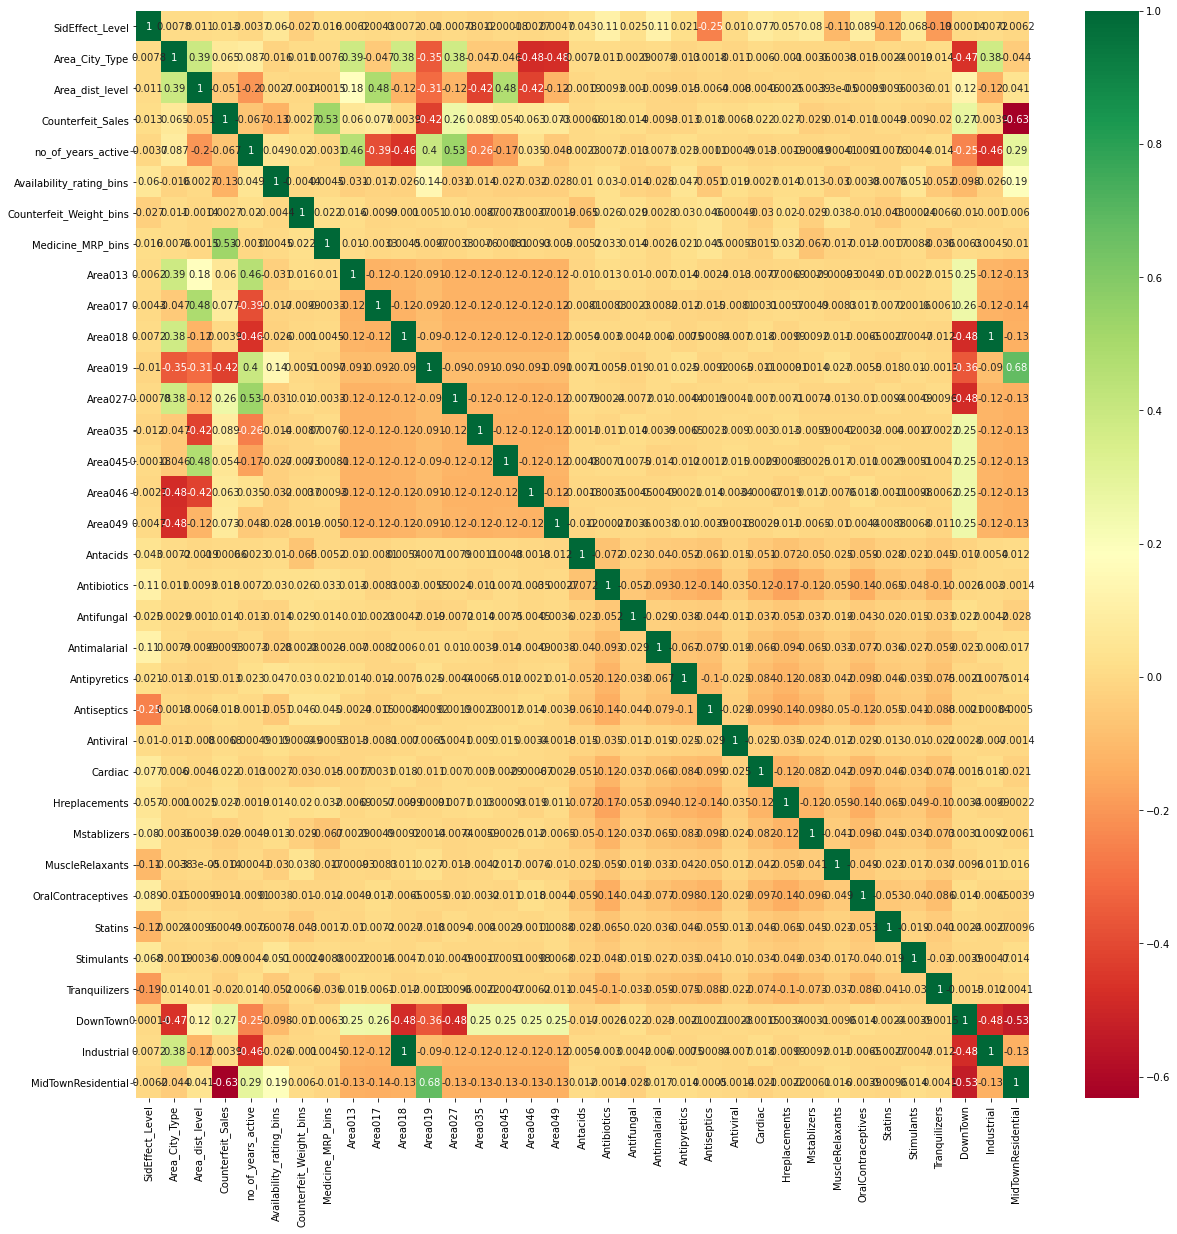

In [73]:

plt.figure(figsize = (20,20))
sns.heatmap(ff.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [74]:
ff= ff.drop('Counterfeit_Weight_bins', axis=1)

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
train_feau=ff.drop('Counterfeit_Sales', axis=1)
train_tar=ff['Counterfeit_Sales']

In [77]:
X_train,X_test,y_train,y_test=train_test_split(train_feau,train_tar,test_size=0.30,random_state=0)


In [78]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(4769, 33) (2045, 33) (4769,) (2045,)


In [79]:
y_train

1556    7.346738
5724    7.021401
670     7.854172
2195    7.667796
2564    6.394206
          ...   
4933    7.599842
3265    6.969567
1654    6.590575
2608    6.662020
2733    6.299755
Name: Counterfeit_Sales, Length: 4769, dtype: float64

### Scaling the Data

In [80]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)


In [95]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Linear Regression

In [82]:
from sklearn.linear_model import LinearRegression

lm=LinearRegression()

lm.fit(X_train,y_train)

X_pred=lm.predict(X_train)

y_pred=lm.predict(X_test)

lm.score(X_test,y_test)

training_score = lm.score(X_train,y_train)
print('training_score_acc :',training_score)

mean_abs_score_train=mean_absolute_error(y_train,X_pred)
print('mean_abs_score_train :', mean_abs_score_train)

testing_score = lm.score(X_test,y_test)
print('testing_score_acc :',testing_score)

mean_abs_score_test=mean_absolute_error(y_test,y_pred)
print('mean_abs_score_test :', mean_abs_score_test)


r2score = r2_score(y_test,y_pred)
print('R2 score:',r2score)

training_score_acc : 0.7074683486232568
mean_abs_score_train : 0.37375163160254404
testing_score_acc : 0.706242272905256
mean_abs_score_test : 0.36610622219393385
R2 score: 0.706242272905256


## Random forest Regressor

In [83]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(criterion='mae')

model.fit(X_train,y_train)

X_pred=model.predict(X_train)

y_pred2=model.predict(X_test)

training_score = model.score(X_train,y_train)
print('training_score_acc :',training_score)


mean_abs_score_train=mean_absolute_error(y_train,X_pred)
print('mean_abs_score_train :', mean_abs_score_train)


testing_score = model.score(X_test,y_test)
print('testing_score_acc :',testing_score)


mean_abs_score_test=mean_absolute_error(y_test,y_pred2)
print('mean_abs_score_test :', mean_abs_score_test)

r2score = r2_score(y_test,y_pred2)
print(r2score)



training_score_acc : 0.9127092769340389
mean_abs_score_train : 0.1940697087054493
testing_score_acc : 0.6498092715204766
mean_abs_score_test : 0.401884006217529
0.6498092715204766


In [85]:
 1-(mean_abs_score_test/1660)

0.9997579012010738

In [86]:
data1 = {'Feature_Name':train_feau.columns, 'Feature_Importance':model.feature_importances_}

feat_imp = pd.DataFrame(data1).sort_values(by='Feature_Importance', ascending=False)
feat_imp

,Feature_Name,Feature_Importance
5,Medicine_MRP_bins,0.273135
32,MidTownResidential,0.245565
4,Availability_rating_bins,0.135330
0,SidEffect_Level,0.038205
3,no_of_years_active,0.037254
23,Hreplacements,0.020005
16,Antibiotics,0.019352
10,Area027,0.017657
20,Antiseptics,0.016276
26,OralContraceptives,0.015934


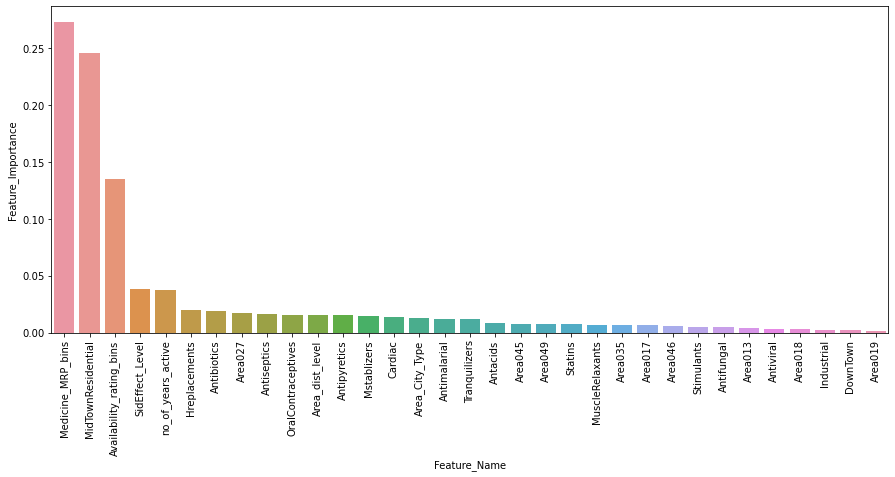

In [87]:
plt.figure(figsize=(15,6))
sns.barplot(data=feat_imp, x='Feature_Name', y='Feature_Importance')
plt.xticks(rotation=90)
plt.show()

## Extra trees Regressor

In [88]:
from sklearn.ensemble import ExtraTreesRegressor
ex_tree = ExtraTreesRegressor()

ex_tree.fit(X_train, y_train)

X_pred4=ex_tree.predict(X_train)

y_pred4=ex_tree.predict(X_test)

mean_abs_score_train=mean_absolute_error(y_train,X_pred4)
mean_abs_score_train

r2score = r2_score(y_test,y_pred4)
print(r2score)

mean_abs_score_test=mean_absolute_error(y_test,y_pred4)
mean_abs_score_test

0.5251903451104784


0.4614543688290577

### XGBOOST Regressor

In [89]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import xgboost as xg

from xgboost import XGBRegressor

xgb = xg.XGBRegressor()

### without hyperparameter tuning

xgb.fit(X_train,y_train)

X_pred3=xgb.predict(X_train)

predictions = xgb.predict(X_test)

training_score = xgb.score(X_train,y_train)
training_score

testing_score = xgb.score(X_test,y_test)
testing_score

mean_abs_score_train=mean_absolute_error(y_train,X_pred3)
print('mean_abs_score_train :', mean_abs_score_train)

mean_squared_error= mean(y_train,X_pred3)
print('mean_abs_score_train :', mean_abs_score_train)

mean_abs_score_test=mean_absolute_error(y_test,predictions)
print('mean_abs_score_test :', mean_abs_score_test)

r2score = r2_score(y_test,predictions)
print(r2score)

mean_abs_score_train : 0.2584157342123479
mean_abs_score_test : 0.4023588271037412
0.6459355777374913


### With Hyperparamter tunning

In [96]:
param_test_xgb = {
 'max_depth'       :[4,5,6],
 'min_child_weight':[0,1,2],
 'gamma'           :[0, 0.1,0.2],
 'reg_alpha'       :[0.1, 0.01, 0.05],
 'reg_lambda'      :[0.1, 0.01, 0.05],
 'colsample_bytree'  :[0.7],
 'learning_rate'     : [.03, 0.02, 0.01],
 'n_estimators'   : [700,850,1000]
}

xgb_rs = RandomizedSearchCV(xgb, param_distributions=param_test_xgb, cv=5, n_iter=10, scoring='neg_mean_absolute_error')

xgb_rs.fit(X_train,y_train)


X_pred5=xgb_rs.predict(X_train)

y_pred5 = xgb_rs.predict(X_test)

training_score = xgb_rs.score(X_train,y_train)
training_score

testing_score = xgb_rs.score(X_test,y_test)
testing_score

mean_abs_score_train=mean_absolute_error(y_train,X_pred5)
print('mean_abs_score_train :', mean_abs_score_train)

mean_square_error_score_train= mean_squared_error(y_train,X_pred5)
print('mean_square_error_score_train :', mean_square_error_score_train)


mean_abs_score_test=mean_absolute_error(y_test,y_pred5)
print('mean_abs_score_test :', mean_abs_score_test)

mean_square_error_score_test= mean_squared_error(y_test,y_pred5)
print('mean_square_error_score_test :', mean_square_error_score_test)

r2score = r2_score(y_test,y_pred5)
print('R2 score:',r2score)
  

mean_abs_score_train : 0.3501692640059232
mean_square_error_score_train : 0.2028975073888028
mean_abs_score_test : 0.3558808924950689
mean_square_error_score_test : 0.20445157832208194
R2 score: 0.7202450068753452


In [97]:
 1-(mean_abs_score_test/1660)

0.9997856139201837

In [92]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}
xgb_rs = RandomizedSearchCV(xgb, param_distributions=params, cv=5, n_iter=10, scoring='neg_mean_absolute_error')

xgb_rs.fit(X_train,y_train)


X_pred5=xgb_rs.predict(X_train)

y_pred5 = xgb_rs.predict(X_test)

training_score = xgb_rs.score(X_train,y_train)
training_score

testing_score = xgb_rs.score(X_test,y_test)
testing_score

mean_abs_score_train=mean_absolute_error(y_train,X_pred5)
print('mean_abs_score_train :', mean_abs_score_train)


mean_abs_score_test=mean_absolute_error(y_test,y_pred5)
print('mean_abs_score_test :', mean_abs_score_test)

r2score = r2_score(y_test,y_pred5)
print('R2 score:',r2score)
  

mean_abs_score_train : 0.34564536719147404
mean_abs_score_test : 0.35632634891689724
R2 score: 0.7183112247665807


In [94]:
 1-(0.35632634891689724/1660)

0.9997853455729416